In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn import preprocessing # Used this normalizing technique but did not give good results

In [2]:
df = pd.read_excel('C:/Users/Jordan/Desktop/jupyter notebook/Correla/site1.xlsx')

In [3]:
df.head()

,Unnamed: 0,Site,Date,Vol,SiteNo
0,0,Site1,2019-04-02,9,0
1,1,Site1,2019-04-03,15,0
2,2,Site1,2019-04-04,16,0
3,3,Site1,2019-04-05,16,0
4,4,Site1,2019-04-06,9,0


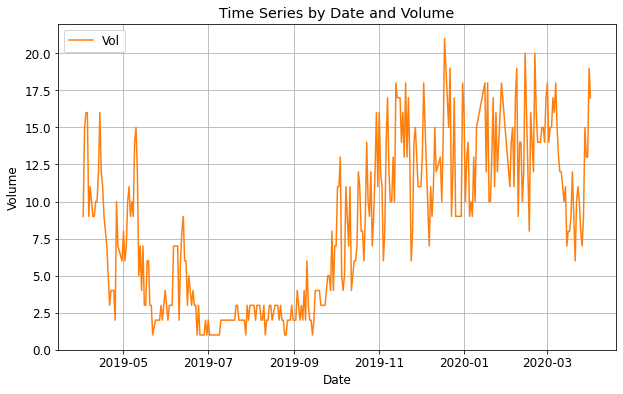

In [4]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.Date, df.Vol, color='tab:orange', label='Vol')

# Same as above
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.set_title('Time Series by Date and Volume')
ax.grid(True)
ax.legend(loc='upper left');

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']= df['Date'].map(dt.datetime.toordinal)

In [6]:
df.head()

,Unnamed: 0,Site,Date,Vol,SiteNo
0,0,Site1,737151,9,0
1,1,Site1,737152,15,0
2,2,Site1,737153,16,0
3,3,Site1,737154,16,0
4,4,Site1,737155,9,0


# Regression

In [7]:
# df['Date'] = np.log(df.Date+1)
# df['Vol'] = np.log(df.Vol+1)

In [8]:
X = df[['Date']]
y = df['Vol']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Building the LinearRegression Model
LRModel = LinearRegression()
LRModel.fit(X_train, y_train)
predictions = LRModel.predict(X_test)

In [10]:
#Linear Regrression
accuracy = metrics.r2_score(y_test, predictions)*100
MAE = mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)

print('Accuracy (R-Square):', accuracy)
print('Mean Absolute Error:',MAE)
print ('Mean Squared Error:',MSE)

Accuracy (R-Square): 33.9386536258092
Mean Absolute Error: 3.6832390261447143
Mean Squared Error: 18.104499794605474


In [11]:
print("Linear regression predictions for site 1:", predictions)

Linear regression predictions for site 1: [10.00349251  6.41500654  6.32603582  4.13142456  6.68191872 11.45668105
  8.37236253  8.2833918  13.59197848  3.56794329  6.6226049   9.58829579
 12.25741759 11.10079814  6.20740818  7.48265526  6.47432036  7.33437072
  7.63093981  3.09343275  8.99515761  4.54662129 12.52432977  6.47432036
  7.2750569   5.64392691  6.17775127  8.07579344  7.09711545 12.90986958
  8.22407798  4.04245383  6.05912364 10.71525833  5.28804401  2.97480512
  9.17309907 13.35472321  6.23706509  5.22873019  5.46598546  2.9154913
 10.68560142 10.80422905  4.2500522   8.72824543 12.04981922 11.04148432
  5.13975946  3.86451238 11.18976887  8.40201944  9.88486488  5.40667164
  4.84319037  8.87652998  4.6059351  13.44369394 11.99050541  4.22039529
  9.76623724 13.20643867 12.99884031  9.91452179  8.10545035  5.11010255
  5.19907328  3.30103111  4.9321611 ]


In [12]:
#Building the XGB model
xg_boost = xgb.XGBRegressor()
xg_boost.fit(X_train, y_train)
xgb_pred = xg_boost.predict(X_test)

predictions = xg_boost.predict(X_test)

In [13]:
#XG Boost
accuracy = metrics.r2_score(y_test, xgb_pred)*100
MAE = mean_absolute_error(y_test,xgb_pred)
MSE = metrics.mean_squared_error(y_test, xgb_pred)

print('Accuracy (R2-score):', accuracy)
print('Mean Absolute Error:',MAE)
print ('Mean Squared Error :',MSE)

Accuracy (R2-score): 70.29281764631314
Mean Absolute Error: 1.907097818194956
Mean Squared Error : 8.141427723470601


In [14]:
print("XG Boost predictions for site 1:", xgb_pred)

XG Boost predictions for site 1: [11.100908   2.74694    2.0504124  3.4311364  1.5945965 10.280285
  5.559324  12.231572  18.868639   9.592773   2.0919442 14.928622
 15.5337105  9.3772135  2.0800285  2.2711644  2.510237   2.0056887
  2.041369  10.020256   9.294333   3.386385  14.194099   2.510237
  2.0056887  1.1337202  2.0800285  5.0975266  1.3504441 15.031189
 10.987034   4.3839474  2.491789  16.935034   1.1556352  9.917022
 11.047516  10.855209   2.0800285  1.1556352  1.6022533  9.128877
 18.678415   9.104147   3.047042   8.01923   18.374891   9.3772135
  4.0908346  9.16429   15.006962  10.542836   8.057141   1.6022533
  2.6414654  9.736669   2.614635   7.160623  11.482386   5.4910345
 13.042928   9.008365  12.071402  12.75201    7.59695    4.619352
  4.0908346  7.0200586  8.216179 ]
